# Import software libraries

In [1]:
# Import required libraries.
import sys                                                  # Read system parameters.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import yellowbrick                                          # Visualize elbow and silhouette plots.
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- Yellowbrick 1.3.post1
- scikit-learn 0.23.2


# Read and examine the data

In [3]:
# Read the data.
data = pd.read_pickle('data/customer_data.pickle')


# Preview the first five rows of the data.

data.head()

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


In [4]:
# Get summary statistics for the dataset.
# Count, mean, standard deviation, minimum, maximum, etc.

data.describe()

,frequency,recency,tenure,monetary_value,number_unique_items
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,1.662441,98.435681,214.496244,12.423202,2.151643
std,3.399520,119.996700,112.923328,16.514363,1.444775
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,110.000000,0.000000,1.000000
50%,1.000000,25.000000,240.000000,4.250000,2.000000
75%,2.000000,195.000000,311.000000,20.800000,3.000000
max,78.000000,372.000000,373.000000,234.300000,9.000000


In [5]:
# Check the structure of the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, u12747 to u18283
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frequency            2130 non-null   float64
 1   recency              2130 non-null   float64
 2   tenure               2130 non-null   float64
 3   monetary_value       2130 non-null   float64
 4   number_unique_items  2130 non-null   int64  
 5   churned              2130 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 101.9+ KB


In [6]:
# Get the shape of the data.
data.shape


(2130, 6)

# Train a *k*-means clustering model

In [9]:
# Standardize the training data.

scaler = StandardScaler()
scaler.fit(data)
data_scaled= scaler.transform(data)

In [10]:
# Identify the optimal number of clusters for segmenting customers.

def optimal_number_clusters(data_scaled):
    """Calculates optimal number of clusted based on elbow method."""
    
    sum_of_squared_distances = []
    K = range(1, 30)  # Define the range of clusters to try.

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(data_scaled)
        sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20, 6))

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

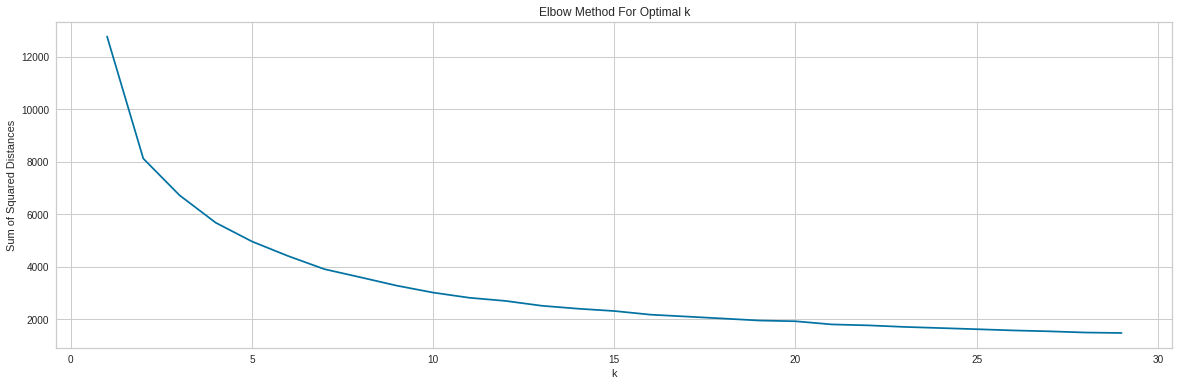

In [11]:
# Call the function to cluster the scaled data and generate an elbow point.

optimal_number_clusters(data_scaled)

# Perform silhouette analysis on the clustering model

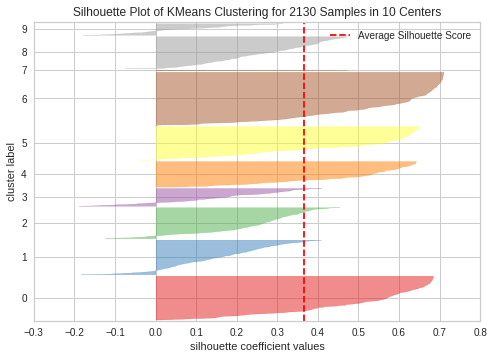

In [12]:
# Use SilhouetteVisualizer() to generate silhouette plots and scores for a model with 10 clusters.

from yellowbrick.cluster import SilhouetteVisualizer
silhouette=SilhouetteVisualizer(KMeans(10, random_state=10))
silhouette.fit(data_scaled)
silhouette.poof();



In [13]:
# Print the number of clusters and the silhouette score.

print("number of clusters:", silhouette.n_clusters_)

print("clusters score:", silhouette.silhouette_score_)



number of clusters: 10
clusters score: 0.3645432144189844


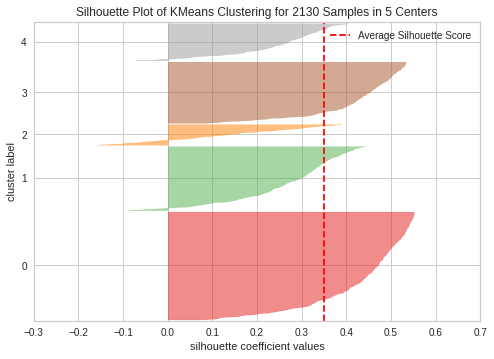

In [14]:
# Use SilhouetteVisualizer() to generate silhouette plots and scores for a model with 5 clusters.

from yellowbrick.cluster import SilhouetteVisualizer
silhouette=SilhouetteVisualizer(KMeans(5, random_state=10))
silhouette.fit(data_scaled)
silhouette.poof();



In [15]:
# Print the number of clusters and the silhouette score.


print("number of clusters:", silhouette.n_clusters_)

print("clusters score:", silhouette.silhouette_score_)


number of clusters: 5
clusters score: 0.34959064927916506


# Train an optimal clustering model

In [17]:
# Define the optimal number of clusters as identified by the silhouette analysis.

n_clusters = 10


# Generate a k-means clustering model using this optimal number of clusters and fit it on the data.

kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(data_scaled)



KMeans(n_clusters=10, random_state=10)

In [18]:
# Determine the clusters for the users.

y_kmeans = kmeans.predict(data_scaled)



# Print a DataFrame that shows each customer and their assigned cluster.
results = pd.DataFrame(data)
results.insert(0,'cluster', y_kmeans)


# Obtain the first five rows.
results.head()


,cluster,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,2,6.0,367.0,369.0,39.19,3,True
u12748,7,41.0,365.0,369.0,12.01,9,False
u12749,2,2.0,127.0,130.0,22.28,2,True
u1282,0,0.0,0.0,326.0,0.00,1,False
u12822,5,0.0,0.0,87.0,0.00,1,True


# Evaluate the clustering model as a whole

In [19]:
# Generate a bar chart that shows how many users were assigned to each cluster.
def cluster_bar(cluster_labels):
    """Create a bar chart to show number of users in each cluster."""
    pd.DataFrame(Counter(cluster_labels).most_common()). \
    set_index(0).plot.bar(legend = None)
    
    plt.title('Distribution of Clusters')
    plt.xlabel('Cluster ID')
    plt.xticks(rotation = 0)
    plt.ylabel('Number of users in cluster');





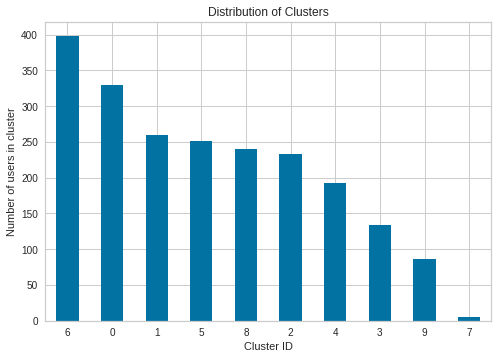

In [20]:
# Get the count of customers in each cluster.
cluster_bar(y_kmeans)


# Evaluate summary statistics for individual clusters

In [22]:
# Get summmary statistics for cluster 0.
cluster0 = results[results.cluster==0]
cluster0.describe()



,cluster,frequency,recency,tenure,monetary_value,number_unique_items
count,329.0,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.0,0.097264,6.252280,266.489362,0.647751,1.325228
std,0.0,0.316649,23.411878,56.996796,2.738197,0.644396
min,0.0,0.000000,0.000000,168.000000,0.000000,1.000000
25%,0.0,0.000000,0.000000,218.000000,0.000000,1.000000
50%,0.0,0.000000,0.000000,264.000000,0.000000,1.000000
75%,0.0,0.000000,0.000000,308.000000,0.000000,1.000000
max,0.0,2.000000,153.000000,373.000000,20.280000,4.000000


In [24]:
# Get the average amount spent by cluster 0.

cluster0 = results[results.cluster==0]
cluster0.monetary_value.mean()


0.6477507598784195

In [25]:
# Get summmary statistics for cluster 3.
cluster3 = results[results.cluster==3]
cluster3.describe()



,cluster,frequency,recency,tenure,monetary_value,number_unique_items
count,134.0,134.000000,134.000000,134.000000,134.000000,134.000000
mean,3.0,8.798507,303.895522,328.626866,26.820746,5.425373
std,0.0,3.963707,56.970018,50.313404,12.776404,1.294156
min,3.0,2.000000,75.000000,79.000000,5.290000,2.000000
25%,3.0,6.000000,276.000000,308.500000,16.935000,5.000000
50%,3.0,8.000000,312.500000,338.500000,25.435000,5.000000
75%,3.0,11.000000,351.750000,365.000000,37.155000,6.000000
max,3.0,22.000000,372.000000,373.000000,59.570000,8.000000


In [26]:
# Get the average amount spent by cluster 3.

cluster3 = results[results.cluster==3]
cluster3.monetary_value.mean()


26.82074626865671

In [27]:
# Get summmary statistics for cluster 4.

cluster4 = results[results.cluster==4]
cluster4.describe()


,cluster,frequency,recency,tenure,monetary_value,number_unique_items
count,192.0,192.000000,192.000000,192.000000,192.000000,192.000000
mean,4.0,0.140625,7.911458,274.619792,1.963385,1.468750
std,0.0,0.363254,24.259882,54.492962,5.797236,0.708263
min,4.0,0.000000,0.000000,179.000000,0.000000,1.000000
25%,4.0,0.000000,0.000000,233.750000,0.000000,1.000000
50%,4.0,0.000000,0.000000,269.500000,0.000000,1.000000
75%,4.0,0.000000,0.000000,317.000000,0.000000,2.000000
max,4.0,2.000000,155.000000,373.000000,39.000000,4.000000


In [28]:
# Get the average amount spent by cluster 4.
cluster4 = results[results.cluster==4]
cluster4.monetary_value.mean()



1.9633854166666664

# Evaluate the distribution of features for individual clusters

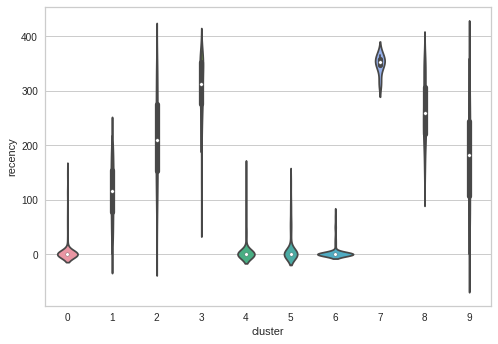

In [39]:
# Generate violin subplots for the distribution of the "recency" feature for each of the clusters.

sns.violinplot(data = data, x= results['cluster'], y=results['recency'], linwidth = 30);








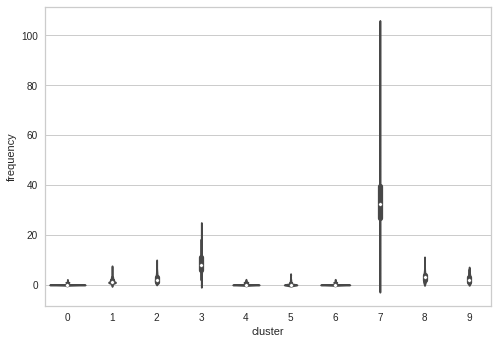

In [43]:
# Generate violin subplots for the distribution of the "frequency" feature for each of the clusters.


sns.violinplot(data = data, x= results['cluster'], y=results['frequency'], figsize=(20, 15));






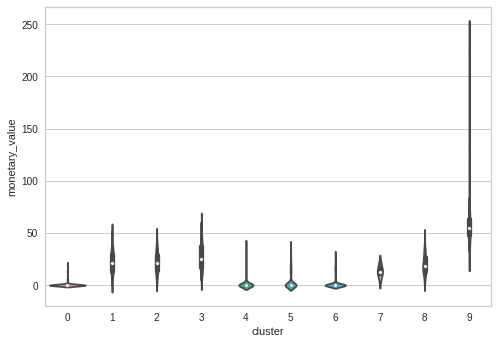

In [48]:
# Generate violin subplots for the distribution of the "monetary_value" feature for each of the clusters.



sns.violinplot(data = data, x= results['cluster'], y=results['monetary_value']);






# Perform PCA to visualize the clusters in two dimensions

In [56]:
# This function performs principal component analysis (PCA) to facilitate the visualization of clustering in two dimensions.

def visualize(y_kmeans, data_scaled, n_clusters):
    """
    Run PCA on the data to reduce the dimensions.
    
    Visualize the customers with their predicted clusters.

    """

    reduced_data = PCA(n_components = 2).fit_transform(data_scaled)
    results = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
    results = pd.concat([results, pd.DataFrame(y_kmeans)], axis = 1).rename(columns={0 : "cluster"})

    cmap = sns.color_palette('Set1', n_colors = n_clusters, desat = .5)

    sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = results, palette = cmap, legend = True)
    plt.title('k-means Clustering with 2 Dimensions')
    plt.show();

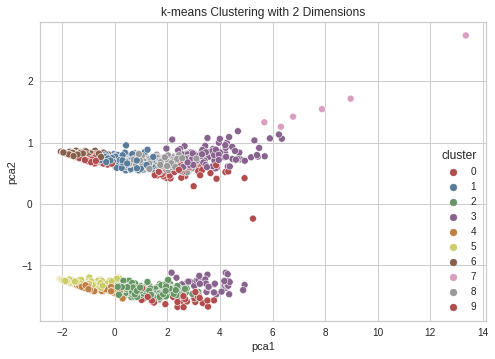

In [57]:
# Call the function to perform PCA and plot the clusters.
visualize(y_kmeans, data_scaled, 10)


# Save the optimal model

In [58]:
# Save the optimal model as a pickle file named optimal_clustering_model.pickle.
pickle.dump(kmeans, open('optimal_clustering_model.pickle', 'wb'))
